<a href="https://colab.research.google.com/github/LaJeremi/pratice/blob/main/%EC%A0%84%EC%82%B0%ED%95%99_find_stat_%EC%8B%A4%EC%8A%B5_%EC%97%B0%EB%8F%84%EB%B3%84_%EC%8B%A0%EB%AC%B8%EA%B8%B0%EC%82%AC_%EB%A7%90%EB%AD%89%EC%B9%98%EC%97%90%EC%84%9C_%ED%8A%B9%EC%A0%95_%EB%AC%B8%EC%9E%90%EC%97%B4_%EC%B6%9C%ED%98%84_%EB%B9%88%EB%8F%84_%EC%B0%BE%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from glob import glob

In [18]:
for i in range(1990, 2016):
	print(glob(f"/content/drive/MyDrive/newspaper_year/{i}/*.txt"))

['/content/drive/MyDrive/newspaper_year/1990/한겨레1990년.txt', '/content/drive/MyDrive/newspaper_year/1990/중앙1990.txt', '/content/drive/MyDrive/newspaper_year/1990/경향1990년.txt', '/content/drive/MyDrive/newspaper_year/1990/조선1990.txt', '/content/drive/MyDrive/newspaper_year/1990/국민1990년.txt', '/content/drive/MyDrive/newspaper_year/1990/서울1990.txt', '/content/drive/MyDrive/newspaper_year/1990/동아1990년.txt', '/content/drive/MyDrive/newspaper_year/1990/세계1990.txt', '/content/drive/MyDrive/newspaper_year/1990/한국1990.txt']
['/content/drive/MyDrive/newspaper_year/1991/한국1991.txt', '/content/drive/MyDrive/newspaper_year/1991/세계1991.txt', '/content/drive/MyDrive/newspaper_year/1991/경향1991년.txt', '/content/drive/MyDrive/newspaper_year/1991/국민1991년.txt', '/content/drive/MyDrive/newspaper_year/1991/한겨레1991년.txt', '/content/drive/MyDrive/newspaper_year/1991/중앙1991.txt', '/content/drive/MyDrive/newspaper_year/1991/동아1991년.txt', '/co

In [19]:
corpus = [""] * 26

In [21]:
def load_corpus():
	for i in range(1990, 2016):
		for fn in glob(f"/content/drive/MyDrive/newspaper_year/{i}/*.txt"):
			with open(fn) as fs:
				corpus[i-1990] += fs.read()

In [22]:
load_corpus()

In [23]:
len(corpus)

26

In [24]:
lens = [0] * 26

In [25]:
for i, cor in enumerate(corpus):
	lens[i] = len(cor)

In [26]:
print(lens)

[134979232, 136101614, 148750153, 155644132, 158662116, 160470627, 170739058, 187793254, 146630442, 97380076, 74415942, 84404385, 140646863, 135298070, 125657379, 151955171, 177862820, 185247605, 335668891, 203096971, 178682186, 129023460, 155733017, 585241095, 417303518, 318170133]


In [27]:
corpus[0].count("김대중")

8200

In [28]:
import matplotlib.pyplot as plt

In [29]:
from matplotlib import rc

In [44]:
rc('font', family='NanumGothic')

In [31]:
plt.rcParams['axes.unicode_minus'] = False

In [32]:
import pandas as pd

In [33]:
def stat(word, corpus=corpus, lens=lens):
    freqs = [0] * 26
    for i, cor in enumerate(corpus):
        freqs[i] = cor.count(word)
    ratios = [ 100* freq / total for freq, total in zip(freqs, lens) ]
    return pd.DataFrame(zip(list(range(1990, 2016)), ratios), columns=["year", word]).set_index("year")

In [42]:
df_김대중 = stat("김대중")
print(df_김대중)

           김대중
year          
1990  0.006075
1991  0.005206
1992  0.010465
1993  0.002735
1994  0.002663
1995  0.008622
1996  0.007252
1997  0.018620
1998  0.019462
1999  0.018312
2000  0.019056
2001  0.014842
2002  0.011851
2003  0.005605
2004  0.002201
2005  0.001517
2006  0.001308
2007  0.001466
2008  0.001090
2009  0.001903
2010  0.001022
2011  0.000921
2012  0.001362
2013  0.000751
2014  0.000615
2015  0.000969


<Axes: xlabel='year'>

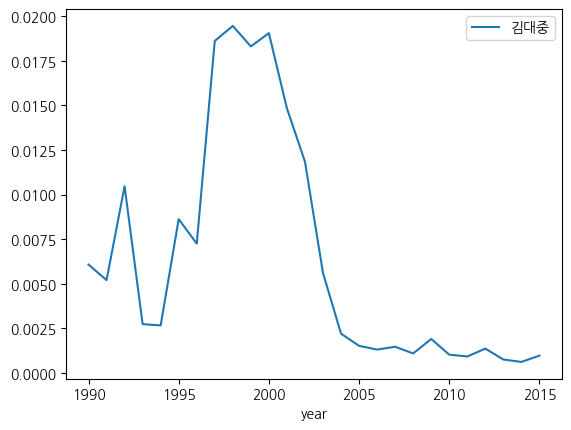

In [45]:
df_김대중.plot()

In [46]:
df_센터 = stat("센터")

df_시스템 = stat("시스템")

df_프로그램 = stat("프로그램")

df_대기업 = stat("대기업")

<Axes: xlabel='year'>

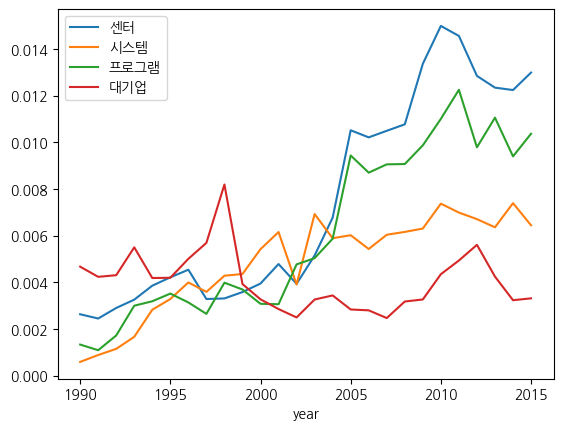

In [47]:
pd.concat([df_센터, df_시스템, df_프로그램, df_대기업], axis=1).plot()